# Linear Regression

**In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).**

**The purpose is to find the best line which describes the data more accurately.**

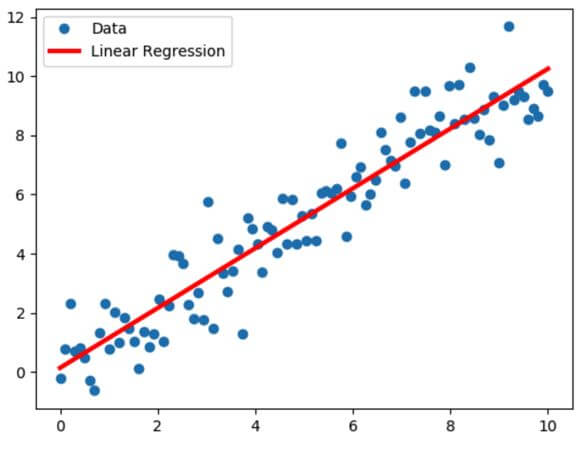

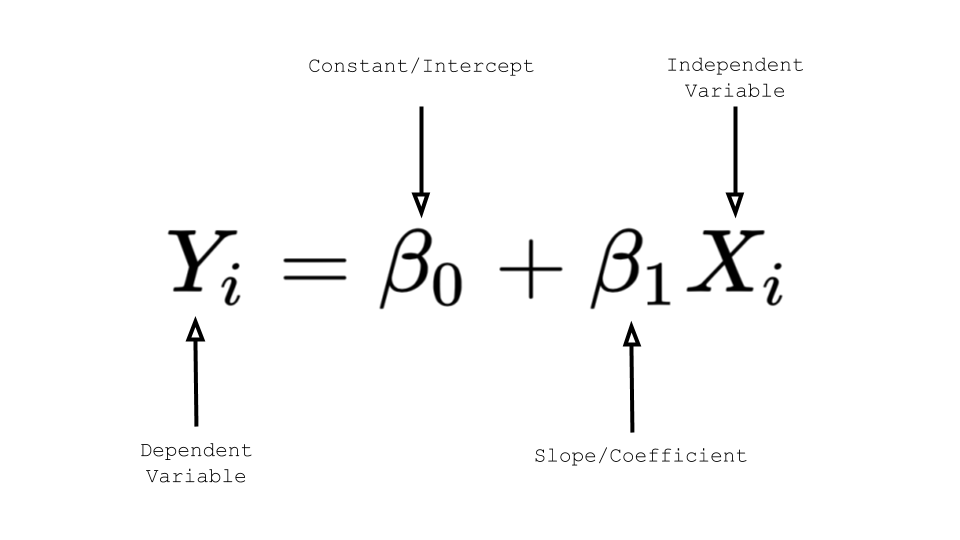

# Read the data

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("Advertising.csv")
data = df.copy()
data[:10]

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [2]:
data = data.iloc[:,1:]
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Check null values

In [3]:
data.isnull().values.any()

False

# Describe the statistics

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [6]:
data.cov()

,TV,radio,newspaper,sales
TV,7370.949893,69.862492,105.919452,350.390195
radio,69.862492,220.427743,114.496979,44.635688
newspaper,105.919452,114.496979,474.308326,25.941392
sales,350.390195,44.635688,25.941392,27.221853


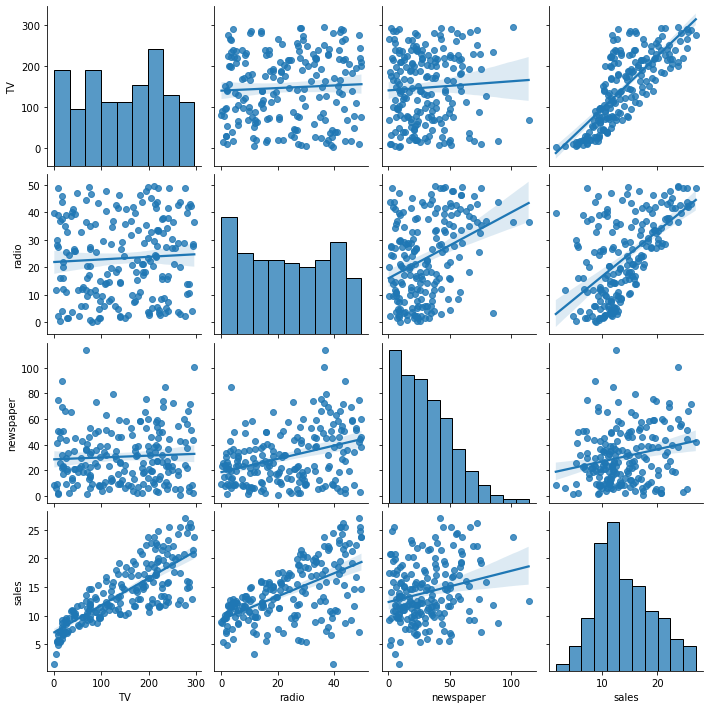

In [7]:
sns.pairplot(data,kind="reg")

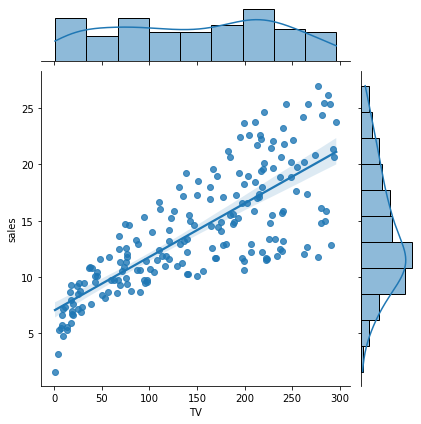

In [8]:
sns.jointplot(x = "TV", y = "sales", data = data,kind="reg")

# 1 - Model with statsmodels

In [9]:
import statsmodels.api as sm

In [10]:
# Select independent variable

X = data[["TV"]]
X[:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [11]:
# Select constant 
X = sm.add_constant(X)
X[:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [12]:
# Select dependent variable

y = df[["sales"]]
y[:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [13]:
linearModel = sm.OLS(y,X)

model = linearModel.fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           1.47e-42
Time:                        21:29:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# What is R2 Score ? 

**It is a measure of how well the model's predicted values explain the actual data.**

**R2 = 1 means that the experimental data is perfect.Proof that it provides a linear curve.**

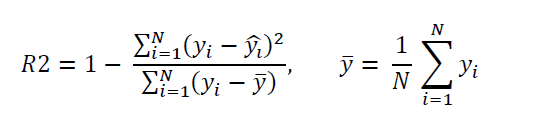

In [15]:
model.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Sat, 08 Oct 2022",Prob (F-statistic):,1.47e-42
Time:,21:29:19,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [16]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


## Find confidence interval

In [17]:
model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


## Find loss value

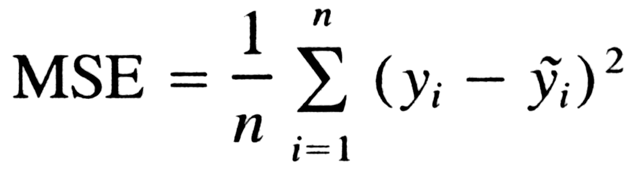

In [18]:
model.mse_model

3314.618166868649

## Find R2 Score and Adjusted R2 Score

In [19]:
print(f"R2 Score : {model.rsquared}")
print(f"Adjusted R2 Score : {model.rsquared_adj}")

R2 Score : 0.611875050850071
Adjusted R2 Score : 0.6099148238341623


## Get predicted results

In [20]:
model.fittedvalues[:10]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
5     7.446162
6     9.765950
7    12.746498
8     7.441409
9    16.530414
dtype: float64

# Mathematical form of fitted model

In [21]:
model.params

const    7.032594
TV       0.047537
dtype: float64

In [22]:
modelFormula = "Sales = "+"("+str("%.3f" % model.params.const) + " X " +"TV)"+" + "+ str("%.3f" % model.params.TV)
print(modelFormula)

Sales = (7.033 X TV) + 0.048


## Visualize the model

Text(0.5, 1.0, 'Sales = (7.033 X TV) + 0.048')

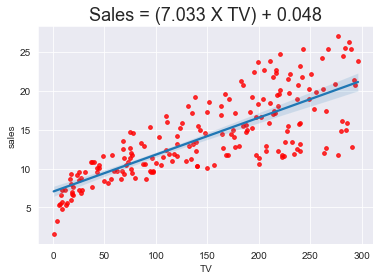

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.regplot(x="TV",y="sales",data=data,scatter_kws={"color":"r","s":14})
plt.title(modelFormula,size=18)

# 2 - Model with sklearn

In [24]:
from sklearn.linear_model import LinearRegression

X = data[["TV"]]
y = data["sales"]

reg = LinearRegression()
model = reg.fit(X,y)

In [25]:
print(f"R2 Score : {model.score(X,y)}")

R2 Score : 0.611875050850071


In [26]:
print(model.coef_[0])
print(model.intercept_)

0.047536640433019764
7.032593549127693


In [27]:
# Get predicted values

model.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [28]:
data["Predicted Sales"] = model.predict(X)
data.head(20)

,TV,radio,newspaper,sales,Predicted Sales
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218
5,8.7,48.9,75.0,7.2,7.446162
6,57.5,32.8,23.5,11.8,9.765950
7,120.2,19.6,11.6,13.2,12.746498
8,8.6,2.1,1.0,4.8,7.441409
9,199.8,2.6,21.2,10.6,16.530414


# Prediction with choosed values

In [29]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")


myValues = [[20],[30],[40]]

model.predict(myValues)

array([7.98332636, 8.45869276, 8.93405917])

## Find MSE Loss

In [30]:
from sklearn.metrics import mean_squared_error,r2_score

results = pd.DataFrame(data={"Actual":y,"Predicted":model.predict(X)})
results.head(10)

,Actual,Predicted
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [31]:
# Calculate (y - y_predicted)

results["Error"] = results["Actual"] - results["Predicted"]
results.head(10)

,Actual,Predicted,Error
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [32]:
# Calculate squared error

results["Error Squared"] = results["Error"]**2
results.head(10)

,Actual,Predicted,Error,Error Squared
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [33]:
# Calculate sum of squared errors

total_loss = np.sum(results["Error Squared"])
print(f"Total loss = {total_loss}")

mse = np.mean(results["Error Squared"])
print(f"MSE Loss = {mse}")

rmse = np.sqrt(mse)
print(f"RMSE Loss = {rmse}")

Total loss = 2102.5305831313512
MSE Loss = 10.512652915656753
RMSE Loss = 3.2423221486546883


In [34]:
mean_squared_error(y,model.predict(X))

10.512652915656757